In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
df = pd.read_csv("covid19_Confirmed_dataset.csv")

In [94]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [95]:
df.shape

(266, 104)

### Dropping the lattitude and longtitude as we aren't plotting geographically

In [96]:
df.drop(columns=["Lat","Long"],inplace=True)

### Some countries are separated by province/ state

In [97]:
df[df["Province/State"].notnull() ]

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025
10,Northern Territory,Australia,0,0,0,0,0,0,0,0,...,28,28,28,28,28,28,28,28,28,28
11,Queensland,Australia,0,0,0,0,0,0,0,1,...,1024,1024,1026,1026,1026,1030,1033,1034,1033,1033
12,South Australia,Australia,0,0,0,0,0,0,0,0,...,437,438,438,438,438,438,438,438,438,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,British Virgin Islands,United Kingdom,0,0,0,0,0,0,0,0,...,5,5,5,5,6,6,6,6,6,6
251,Turks and Caicos Islands,United Kingdom,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,12,12,12,12
256,"Bonaire, Sint Eustatius and Saba",Netherlands,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
258,Falkland Islands (Malvinas),United Kingdom,0,0,0,0,0,0,0,0,...,11,11,12,13,13,13,13,13,13,13


### Aggregating the rows by the country

In [98]:
df_by_country = df.groupby("Country/Region").sum()
df_by_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


### Visualising data using an exmaple

Text(0.5, 1.0, 'Japan confimed cases')

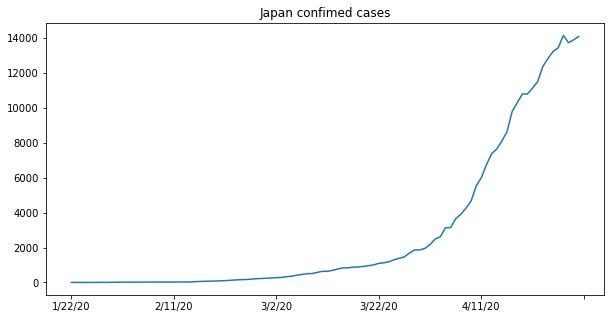

In [99]:
plt.figure(figsize=(10,5))
df_by_country.loc["Japan"].plot.line()
plt.title("Japan confimed cases")

### Compare it with another country

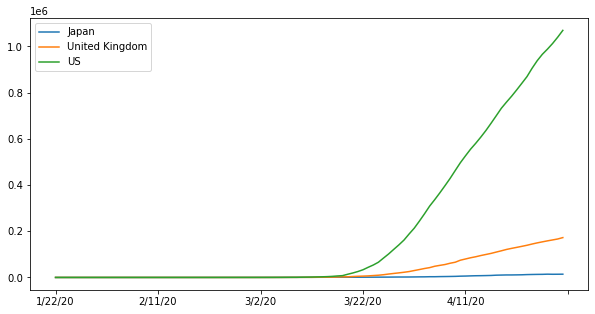

In [100]:
plt.figure(figsize=(10,5))
df_by_country.loc["Japan"].plot.line()
df_by_country.loc["United Kingdom"].plot.line()
df_by_country.loc["US"].plot.line()
plt.legend()

### The 3 countries above seems to have late surge of cases, giving the x-axis starts at 22nd Jan

### Let's find out where is the first case from

In [101]:
df_by_country[df_by_country["1/22/20"]>1]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,83853,83868,83884,83899,83909,83912,83918,83940,83944,83956
Japan,2,2,2,2,4,4,7,7,11,15,...,11135,11512,12368,12829,13231,13441,14153,13736,13895,14088
Thailand,2,3,5,7,8,8,14,14,14,19,...,2811,2826,2839,2907,2907,2922,2931,2938,2947,2954


### China seems to have high confirmed cases at the beginning, let's plot only the first month

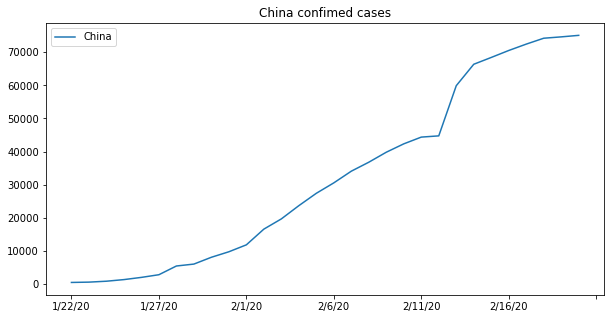

In [102]:
plt.figure(figsize=(10,5))
df_by_country.loc["China"][:30].plot.line()
plt.title("China confimed cases")
plt.legend()

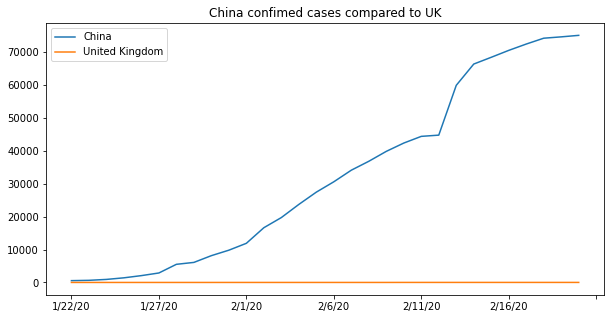

In [103]:
plt.figure(figsize=(10,5))
df_by_country.loc["China"][:30].plot.line()
df_by_country.loc["United Kingdom"][:30].plot.line()
plt.title("China confimed cases compared to UK")
plt.legend()

### Let's further discover the infection day by day in China

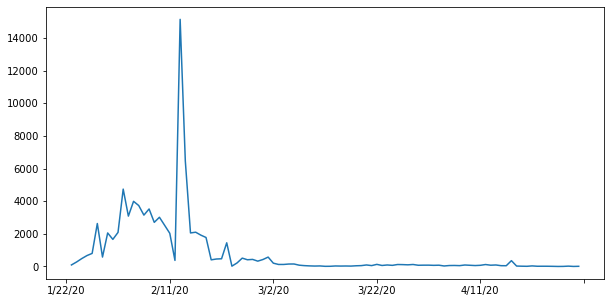

In [104]:
plt.figure(figsize=(10,5))
df_by_country.loc["China"].diff().plot()

### We can see a huge spike in around 11th Feb, the maximum no. of confirmed cases, let's look at the actual number in China, alongside with other countries

In [105]:
df_by_country.loc["China"].diff().max()

15136.0

In [106]:
df_by_country.loc["United Kingdom"].diff().max()

8733.0

In [107]:
df_by_country.loc["Japan"].diff().max()

1161.0

### Explore all countries' maximum confirmed cases 

In [109]:
max_confirmed_cases = []
for country in df_by_country.index:
    max_confirmed_cases.append(df_by_country.loc[country].diff().max())

In [110]:
max_confirmed_cases

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [111]:
df_cases = pd.DataFrame(data=max_confirmed_cases, index=df_by_country.index,columns=["Max confirmed case"])

In [112]:
df_cases

,Max confirmed case
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [113]:
df_by_country = df_by_country.join(df_cases)

In [114]:
df_by_country

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max confirmed case
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


# Interactive Visualisation

In [115]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

# Drag to zoom, hover to view specific countries

In [122]:
df_by_country.transpose().iplot()